## Урок 7

### 1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [118]:
import numpy as np
import math

In [119]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [120]:
zp.shape, ks.shape

((10,), (10,))

1. Вычислим коэффициенты линейной регрессии с учетом свободного члена (intercept)

In [121]:
k = (np.mean(zp * ks) - zp.mean() * ks.mean()) / (np.mean(zp**2) - zp.mean()**2)
print(k)

2.620538882402765


In [122]:
b = ks.mean() - k * zp.mean()
print(b)

444.1773573243596


Построим соответствующие графики

In [123]:
import matplotlib.pyplot as plt

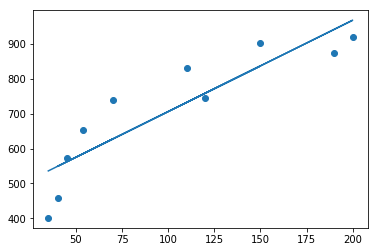

In [124]:
plt.scatter(zp, ks)
plt.plot(zp, k * zp + b)
plt.show()

2. Вычислим угловой коэффициент $k$ без учета свободного члена $b$. Воспользуемся матричной формулой, потому что она универсальная. Формулу, однако, упростим, потому что обращение матрицы здесь вырождается в обращение скаляра. 

Сначала сформируем векторы-столбцы $X$ и $Y$

In [125]:
x = zp.T

In [126]:
y = ks.T

Матричная формула для расчета вектора коэффициентов линейной регрессии $\beta$

$\beta = {(X^T X)}^{-1} X^T Y $

In [127]:
k = np.dot(1 / np.dot(x.T, x) * x.T, y) 
print(k)

5.889820420132689


### 2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [128]:
def mse(x, y, k):
    return np.mean( (y - k * x) ** 2 )

def d_mse_dk(x, y, k):
    return np.mean( -2 * (y - k * x) * x )

alpha = (10) ** (-7)
tol = (10) ** (-3)

k = 0.1
counter = 0
while (1):
    delta = d_mse_dk(zp, ks, k) * alpha
    k -= delta
    counter += 1
    if np.abs( delta ) < tol:
        break

print(k)
print(counter)

5.528075957233513
1005


Почему градиентный спуск дает результат, значительно (я задал tol = 0.001) отличающийся от результата точных формул - не понятно... Видимо большой коэффициент $\alpha$?

### 4.  Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [129]:
def mse(x, y, k, b):
    return np.mean( (y - k * x - b) ** 2 )

def d_mse_dk(x, y, k, b):
    return np.mean( -2 * (y - k * x - b) * x )

def d_mse_db(x, y, k, b):
    return np.mean( -2 * (y - k * x - b) )

alpha_k = (10) ** (-7)
alpha_b = math.sqrt(alpha_k)
tol = (10) ** (-3)

k = 0.1
b = 10.2
counter = 0
while (1):
    delta_k = d_mse_dk(zp, ks, k, b) * alpha_k
    delta_b = d_mse_db(zp, ks, k, b) * alpha_b
    k -= delta_k
    b -= delta_b
    counter += 1
    if np.abs(delta_k) + np.abs(delta_b) < tol:
        break

print(k)
print(b)
print(counter)

2.6770475427257874
436.8786442038018
27646


### 3. В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?

Не понял юмора, но если известна дисперсия генеральной совокупности, то используется таблица значений функции Лапласа; в противном случае - таблица Стьюдента.